In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/content/SampleSuperstore.csv')
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
df = data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [10]:
df.duplicated().sum()

17

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(9977, 13)

In [13]:
data = df.drop(['Country', 'Postal Code'], axis=1)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

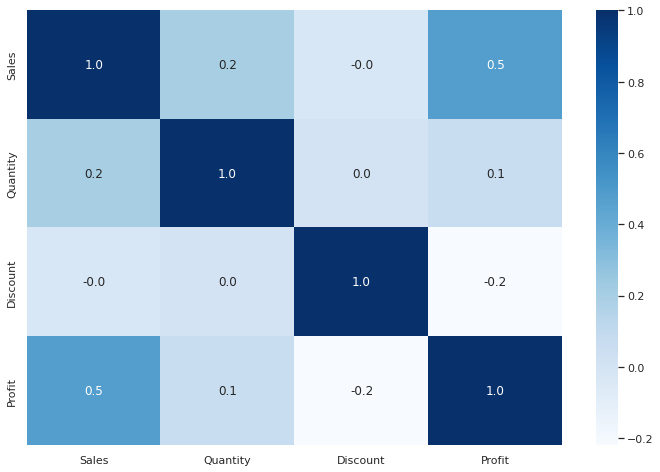

In [91]:
df_con=data.select_dtypes(include=[np.number])
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_con.corr(method='pearson'), annot=True, fmt= '.1f', ax=ax, cmap="Blues")

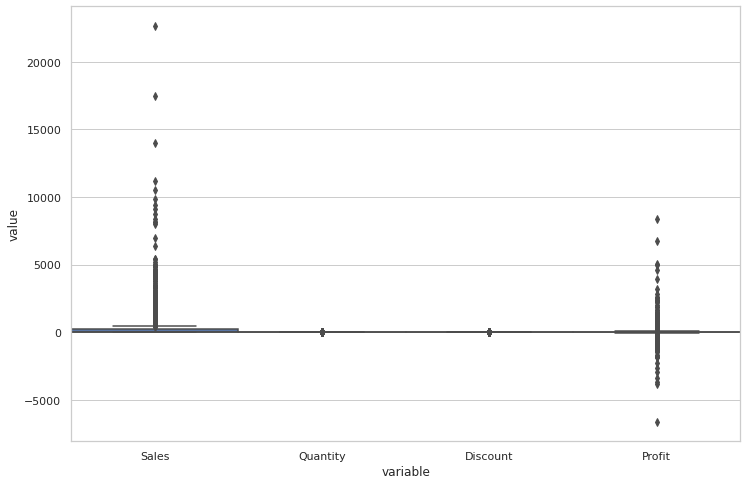

In [22]:
plt.figure(figsize=[12,8])
sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=1)
plt.show()

In [32]:
def remove_outlier(data,k=3.33):
  for col in data.columns:
    if (data[col].dtype=="int64" or data[col].dtype=="float64"):
      mean = data[col].mean()
      global ds
      std = data[col].std()
      outlier = [i for i in data[col] if (i > mean - k* std)]
      outlier = [i for i in outlier if (i < mean +k * std)]
      ds = data.loc[data[col].isin(outlier)]

In [35]:
remove_outlier(data,k=3.33)

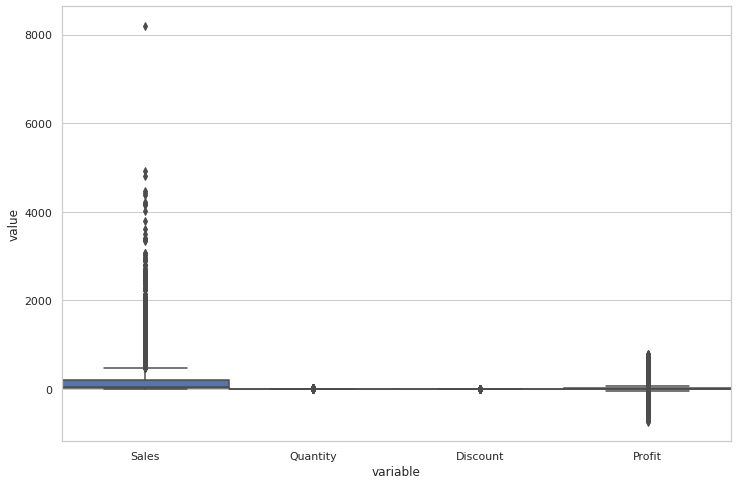

In [37]:
ds_con=ds.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.boxplot(x="variable", y="value", data=pd.melt(ds_con), width=1)
plt.show()

In [38]:
ds.describe()

,Sales,Quantity,Discount,Profit
count,9889.000000,9889.000000,9889.000000,9889.000000
mean,196.570036,3.776519,0.155131,24.150294
std,383.949264,2.222506,0.204991,94.164961
min,0.444000,1.000000,0.000000,-734.526400
25%,17.088000,2.000000,0.000000,1.747200
50%,52.990000,3.000000,0.200000,8.611200
75%,203.520000,5.000000,0.200000,28.857600
max,8187.650000,14.000000,0.800000,793.716000


In [40]:
for col in ds.columns:
  if ds[col].dtype=='object':
    print("Number of unique entries in", col + " are",ds[col].nunique())
    print("==========================================================")

Number of unique entries in Ship Mode are 4
Number of unique entries in Segment are 3
Number of unique entries in City are 531
Number of unique entries in State are 49
Number of unique entries in Region are 4
Number of unique entries in Category are 3
Number of unique entries in Sub-Category are 17


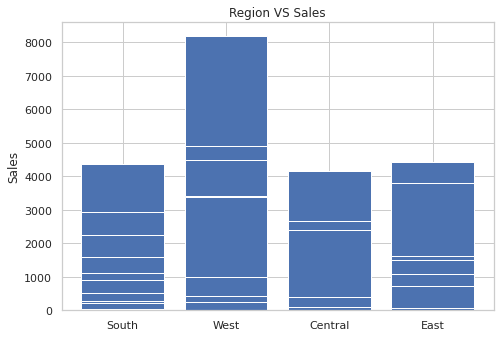

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ds['Region'],ds['Sales'])
plt.title("Region VS Sales")
plt.ylabel("Sales")
plt.show()

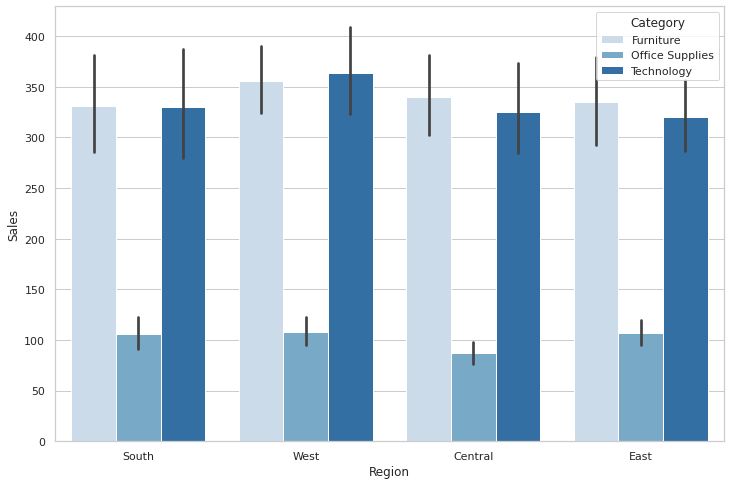

In [42]:
#Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds, palette="Blues")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

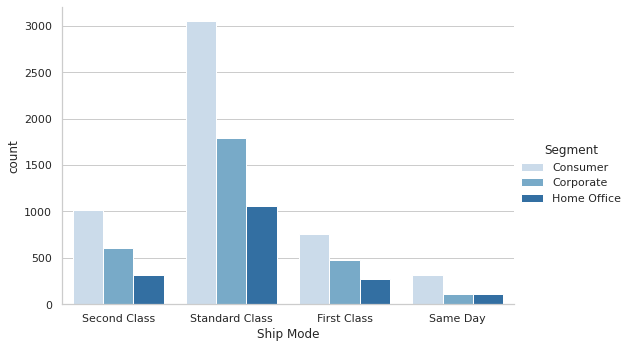

In [43]:
#Segment wise count of the ship modes
plt.figure(figsize=[15,8])
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="Blues")

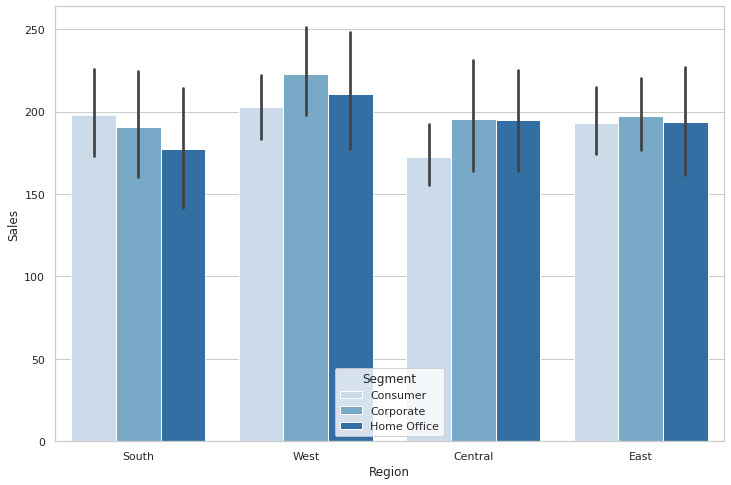

In [44]:
#Segment wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="Blues")

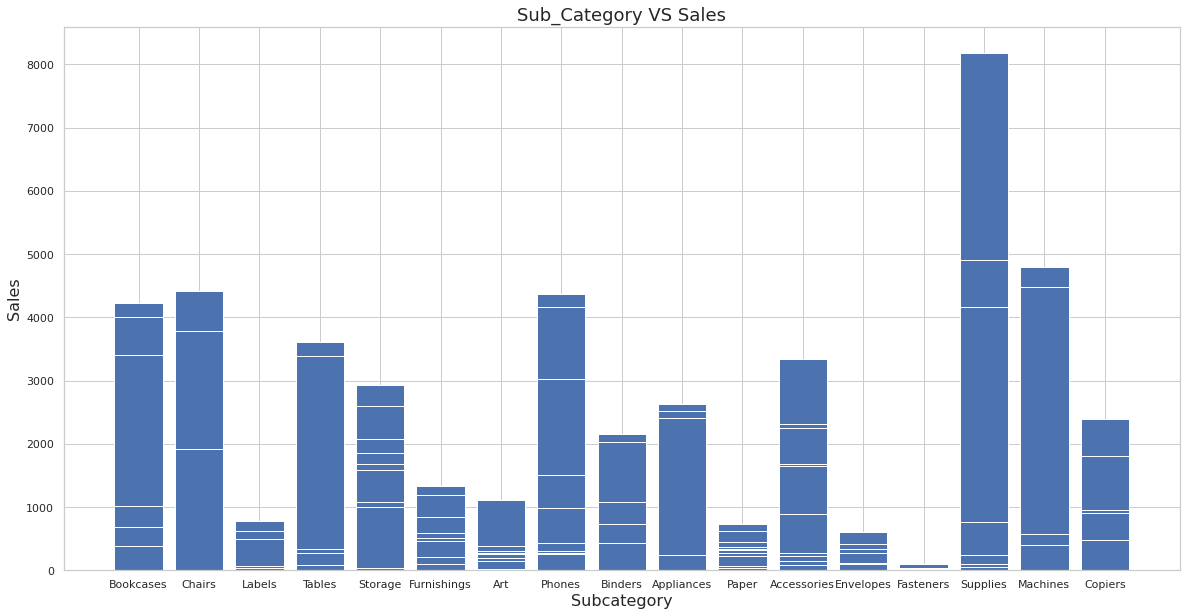

In [45]:
#Sales vs Subcategory
plt.figure(figsize=[20,10])
plt.bar("Sub-Category","Sales",data=ds)
plt.title("Sub_Category VS Sales",fontsize=18)
plt.xlabel("Subcategory", fontsize=16)
plt.ylabel("Sales",fontsize=16)
plt.show()

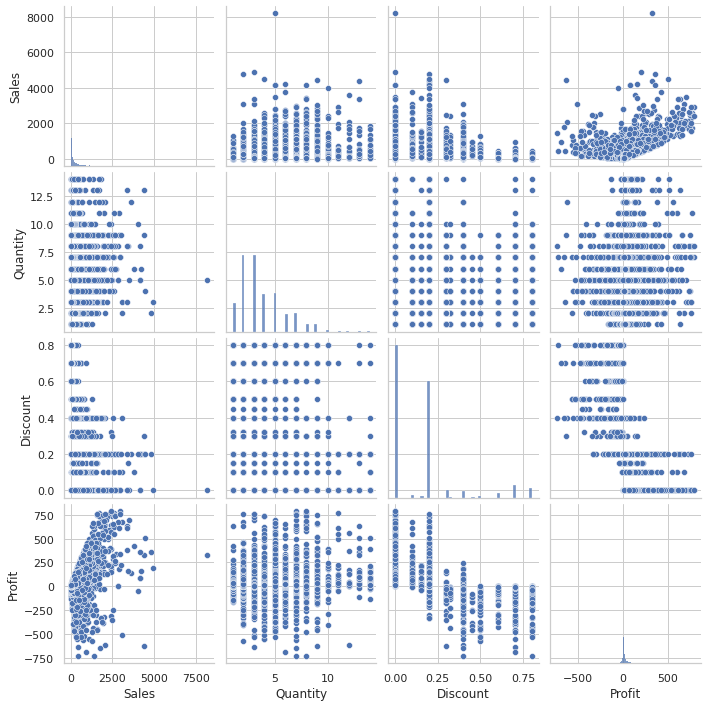

In [46]:
#Let's get some aggregated views from pairplot
sns.pairplot(ds)

In [47]:
#Let's get some insights based on Cities
grouped= ds.groupby("City")
#Aggregated Sales per city
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with highest total sales
agg_sales.head()

,City,Sales
0,New York City,197246.023
1,Los Angeles,164434.549
2,San Francisco,109777.212
3,Seattle,96250.488
4,Philadelphia,91772.849


In [48]:
#Aggregated Profit per city
agg_profit=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with Highest total Profit
agg_profit.head()

,City,Profit
0,New York City,39934.8107
1,Los Angeles,26544.4140
2,Seattle,18916.8467
3,San Francisco,16521.1321
4,Detroit,8200.3235


In [49]:
#Aggregate Discount per city
agg_dist=grouped['Discount'].agg(np.sum).sort_values(ascending=False).reset_index()

#Cities with highest aggregated Discount
agg_dist.head()

,City,Discount
0,Philadelphia,173.50
1,Houston,139.54
2,Chicago,117.90
3,Dallas,55.50
4,Los Angeles,54.70


In [51]:
#Average Sales per city
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average sales
avg_sales.head()

,City,Sales
0,Cheyenne,1603.136000
1,Bellingham,1263.413333
2,Independence,1208.685000
3,Burbank,1082.386000
4,Buffalo,906.349600


In [52]:
#Cities with lowest Average sales
avg_sales.tail()
#Average Profit per city
avg_profit=grouped['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average profit
avg_profit.head()

,City,Profit
0,Independence,487.831500
1,Appleton,277.383150
2,Burbank,254.844600
3,Lehi,225.831300
4,Beverly,218.306467


In [53]:
#Cities with lowest Average profit
avg_profit.tail()

,City,Profit
526,Rockford,-104.500709
527,Normal,-110.023200
528,Yuma,-116.497725
529,Oswego,-178.709200
530,Champaign,-182.352000


In [54]:
#Average Discount per city
avg_dist=grouped['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average discount
avg_dist.head()

,City,Discount
0,Missouri City,0.8
1,Romeoville,0.8
2,Deer Park,0.8
3,Abilene,0.8
4,Elyria,0.7


In [55]:
#Average Discount per city
avg_dist=grouped['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average discount
avg_dist.head()

,City,Discount
0,Missouri City,0.8
1,Romeoville,0.8
2,Deer Park,0.8
3,Abilene,0.8
4,Elyria,0.7


In [56]:
#Cities with lowest Average Discount
avg_dist.tail()

,City,Discount
526,Bozeman,0.0
527,Mobile,0.0
528,Montebello,0.0
529,Montgomery,0.0
530,Aberdeen,0.0


In [57]:
#Cities having High Average Discounts
high_dist=avg_dist[avg_dist['Discount'] >=0.7]

In [58]:
#Cities having low Average Discounts
low_dist=avg_dist[avg_dist['Discount']==0]

In [59]:
#Cities having High Average Sales
high_sales=avg_sales[avg_sales['Sales']>500]

In [60]:
#Cities having low Average Sales
low_sales=avg_sales[avg_sales['Sales']<50]

In [61]:
#Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit']>100]

In [62]:
#Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit']<0]

In [64]:
#**Q1. Which are the cities where discount is maximum but sales are nominal?**
#Cities with High-Average-Discounts but Low-Average-Sales
merged= pd.merge(high_dist,low_sales, on=['City'],how='inner')
merged

,City,Discount,Sales
0,Missouri City,0.8,6.370
1,Romeoville,0.8,8.952
2,Deer Park,0.8,6.924
3,Abilene,0.8,1.392
4,Elyria,0.7,1.824
5,Ormond Beach,0.7,2.808
6,Pensacola,0.7,2.214


In [65]:
#Here we can see 7 Cities where the Company is giving high discounts but Sales very very low. As already Discounts are high, no question of increasing discount further. Hence here our investment is not fruitful.
#Q2. What are the cities having high sales as well as high profit?
#Cities with high Average Sales as well as Average Profit
merged2= pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged2

,City,Sales,Profit
0,Cheyenne,1603.136000,100.196000
1,Bellingham,1263.413333,203.530267
2,Independence,1208.685000,487.831500
3,Burbank,1082.386000,254.844600
4,Beverly,861.063333,218.306467
5,Appleton,835.655000,277.383150
6,Torrance,783.067000,136.287750
7,Lehi,758.363000,225.831300
8,Saint Peters,697.160000,146.403600
9,Norman,675.665000,134.764350


In [66]:
#**Ans 2. The stats above are very pleasing. In all these 15 Cities the sales as well as profit is quite good. Hence if we can invest in these cities (in terms of Discount and other aspects), business can increase more. These can be termed as the Hot-Spots.**
#Q3. Are there any city, where sales is high in spite of 0 discount?
#Cities where Average Discount is less but Average Sales is High
merged3= pd.merge(low_dist,high_sales, on='City', how='inner')
merged3

,City,Discount,Sales
0,Appleton,0.0,835.655000
1,Saint Peters,0.0,697.160000
2,Morristown,0.0,539.853333
3,Harrisonburg,0.0,626.958571
4,Independence,0.0,1208.685000
5,Dubuque,0.0,562.433333
6,Noblesville,0.0,772.795000
7,Norman,0.0,675.665000
8,Beverly,0.0,861.063333
9,Madison,0.0,534.679000


In [67]:
#**Ans 3. These 10 cities are generating high average sales in spite of '0' discount! Hence if our investments can be increased in these cities, then huge sales as well as huge profits can be driven from these Cities. These can be termed as the Dark-Horses.**
#**Q4. Is there any cities where sales is good but generating loss?**
#Cities with high Average sales but low Average profit
merged4= pd.merge(high_sales,low_profit, on='City', how='inner')
merged4

,City,Sales,Profit
0,Richardson,644.232,-12.24465


In [68]:
#Ans 4. In Richardson city, good amount of sales are there but the company is going with loss here. Hence focus can be shifted from here or the reasons are to be found!
#**Q5. Are there cities with high discounts yet very low profit margin/LOSS?**
#Cities with high Average discount but low Average profit
merged5= pd.merge(high_dist,low_profit, on='City', how='inner')
merged5

,City,Discount,Profit
0,Missouri City,0.8,-9.5550
1,Romeoville,0.8,-14.7708
2,Deer Park,0.8,-10.3860
3,Abilene,0.8,-3.7584
4,Elyria,0.7,-1.3984
5,Littleton,0.7,-98.8018
6,Ormond Beach,0.7,-1.9656
7,Pensacola,0.7,-1.4760


In [69]:
#Ans 5. The 8 cities above gets highest average Discount, but here the business is generating loss! Either strong focus is to be given in these cities to find out the faults or Discounts are to withdrawn to make up the loss.
#**Q6. Which are the cities with very low discount but high profit?**
#Cities with low Average discount but High Average profit
merged6= pd.merge(low_dist, high_profit, on='City', how='inner')
merged6

,City,Discount,Profit
0,Vacaville,0.0,110.052800
1,Appleton,0.0,277.383150
2,Saint Cloud,0.0,156.538000
3,Saint Peters,0.0,146.403600
4,Washington,0.0,105.958930
5,Morristown,0.0,165.842750
6,Harrisonburg,0.0,127.074843
7,Independence,0.0,487.831500
8,Indianapolis,0.0,119.202339
9,Kenosha,0.0,114.230311


Ans4. Here are the 18 cities, where the company is not at all providing any discount, yet these cities are genetating good amount of profit. Hence more and more care is to be taken and investments are to be made in these kinds of Hot-Spots!

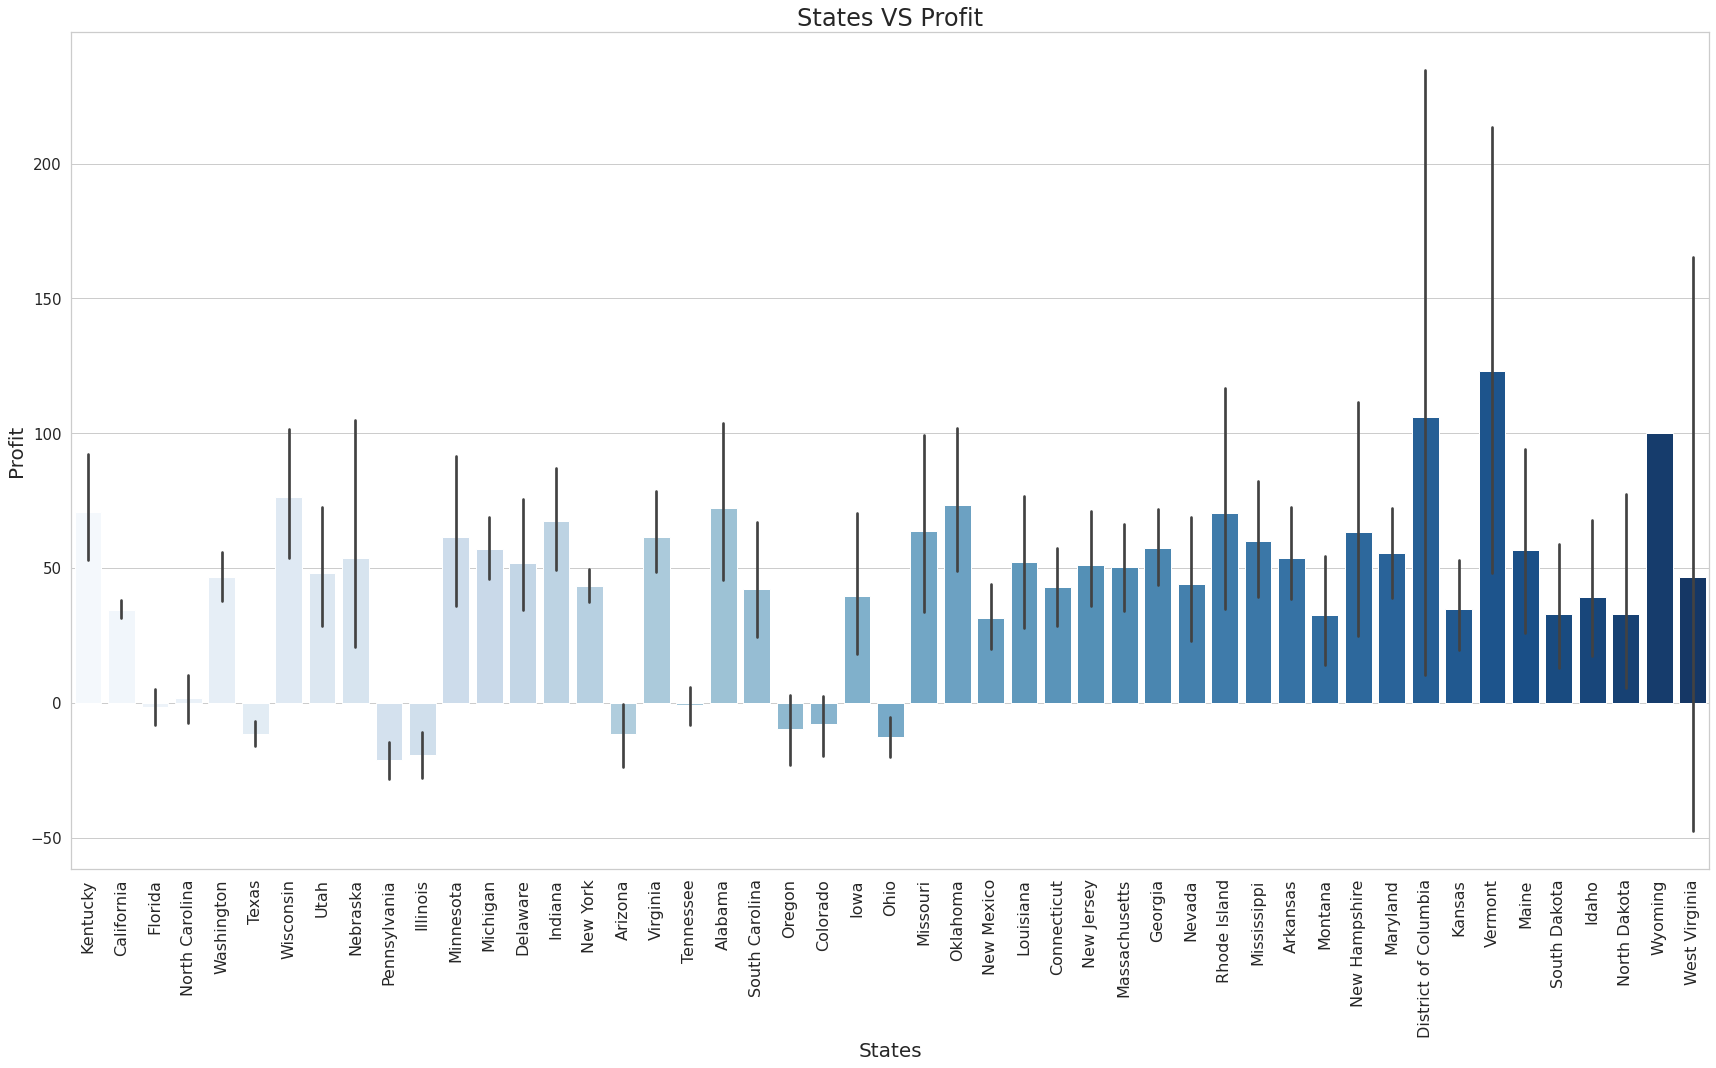

In [71]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="Blues",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

Observation:- The plot shows, 'District of Columbia', 'Vermont','Wyoming' states are generating highest profits. And States like 'Texas', 'Pennsylvania','Illinois','Arizona','Oregon','Colorado','Ohio' are generating losses. Hence focus has to be given in such States.

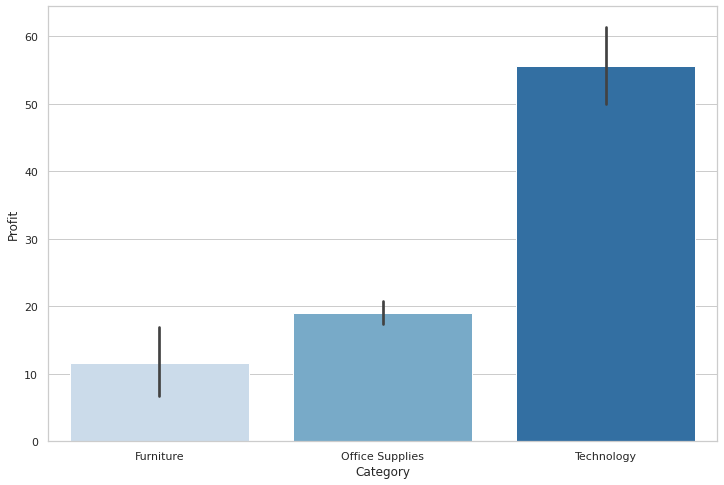

In [74]:
#Category Wise profit in the whole country
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=ds, palette="Blues")

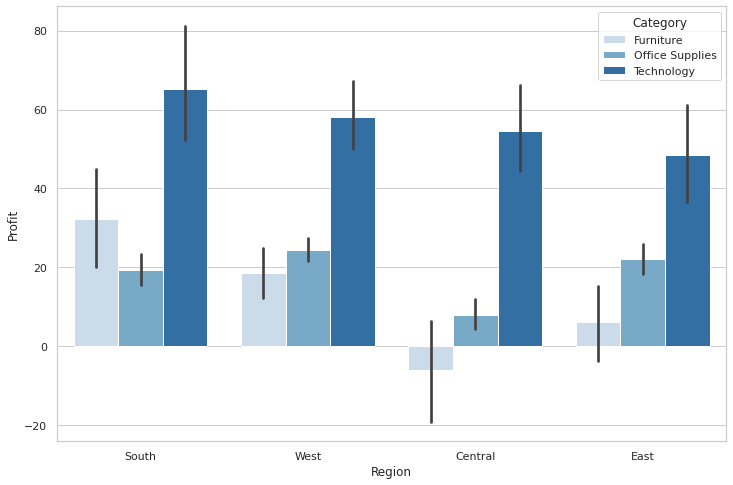

In [76]:
#Category wise Profit in Each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=ds, palette="Blues")

Observation:- Highest profit is generated from Category='Technology'. 'Furniture' is lagging the list.

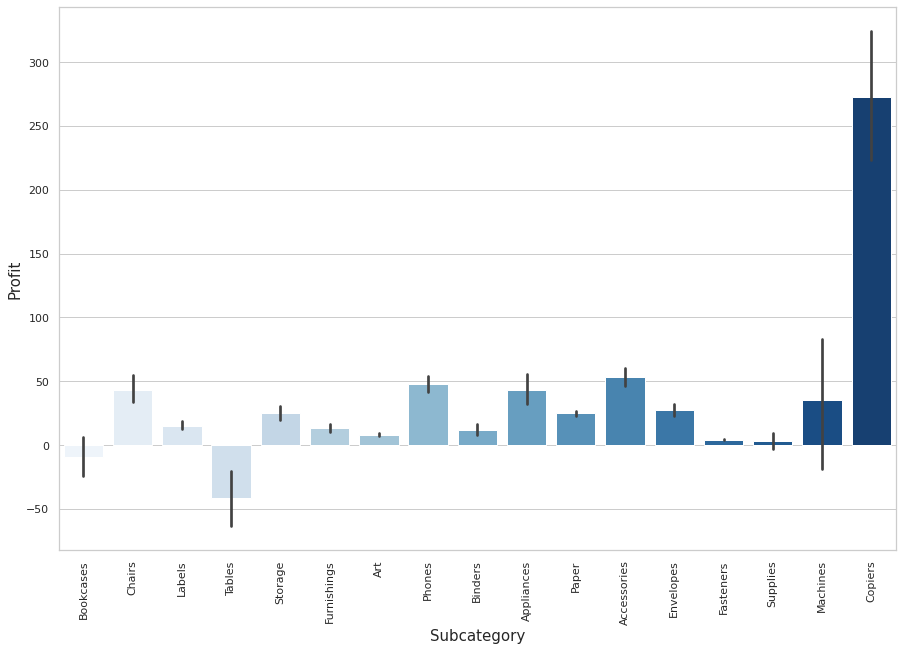

In [79]:
#Subcategory wise profit
plt.figure(figsize=[15,10])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="Blues")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Observation:- Simply 'Technology' generates highest profit in every region. And 'Furniture' is lagging in all the regions except South region. Most importantly, at Central region, 'Furniture' is experiencing loss. These points are to be noted and taken care of

Observation:- As we can see, 'Copiers' are gaining huge profit. 'Accessories' are also doing good. But 'Tables' and 'Bookcases' are going with loss. Respective steps are to be taken to improve the business in these Subcategories.

As we can see, the Profit is maximum in case of Category= Technology, So we should explore that more!

In [83]:
#Entries with Category=Technology
ds_tech=ds[(ds['Category']=="Technology")]
ds_tech.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.152,6,0.2,90.7152
11,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,911.424,4,0.2,68.3568
19,Second Class,Consumer,San Francisco,California,West,Technology,Phones,213.480,3,0.2,16.0110
26,Second Class,Consumer,Los Angeles,California,West,Technology,Accessories,90.570,3,0.0,11.7741
35,First Class,Corporate,Richardson,Texas,Central,Technology,Phones,1097.544,7,0.2,123.4737


Text(0, 0.5, 'Sales')

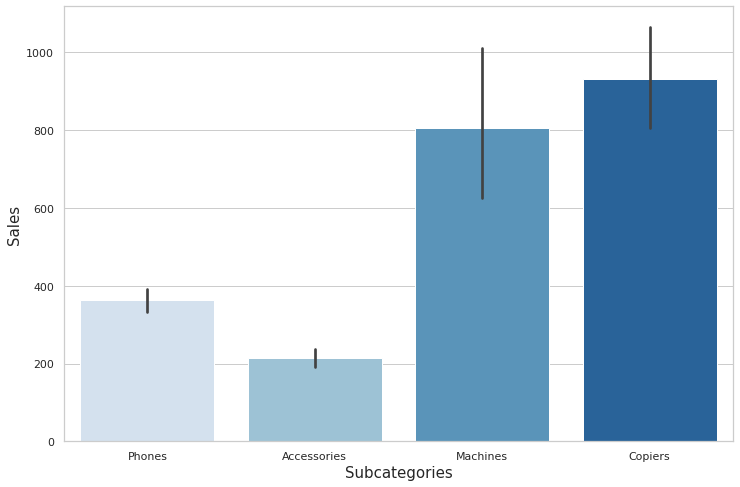

In [84]:
#Let's get the Sales of each Subcategory under Technology
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

Observation:- In category 'Technology', subcategory 'Copiers' is having the highest sales, where 'Accessories' is having lowest amount of sales. 'Machines' subcategory is also performing good.

Text(0, 0.5, 'Profit')

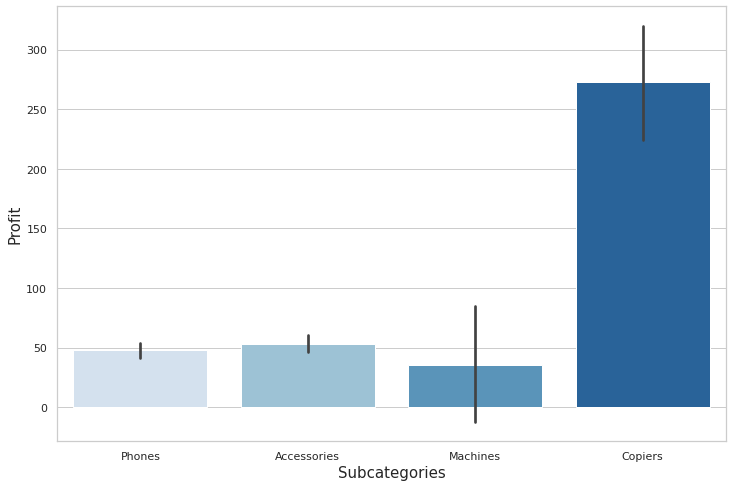

In [86]:
#Let's get the Profit of each Subcategory under Technology
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

In [87]:
#**Observation:- It's clear from the picture that 'Copiers' is generating the highest profit as mentioned earlier, but 'Machines' are lagging in this case in spite of generating good amount of sales, as shown previously.**

Text(0, 0.5, 'Profit')

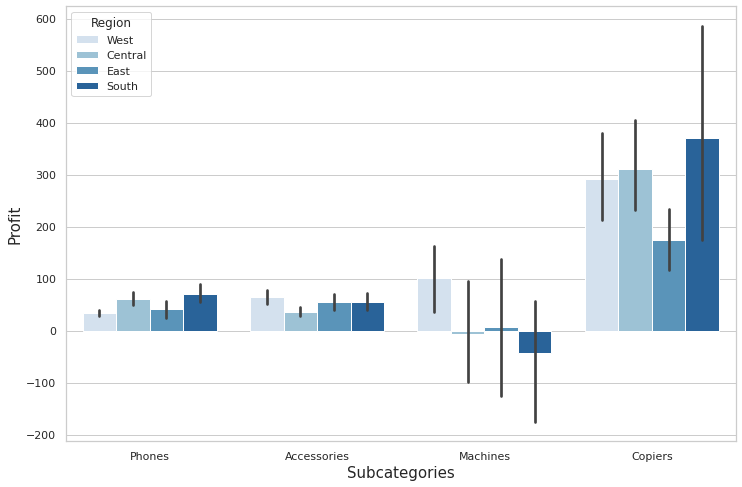

In [88]:
#Let's get the Profit of each Subcategory under Technology for each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

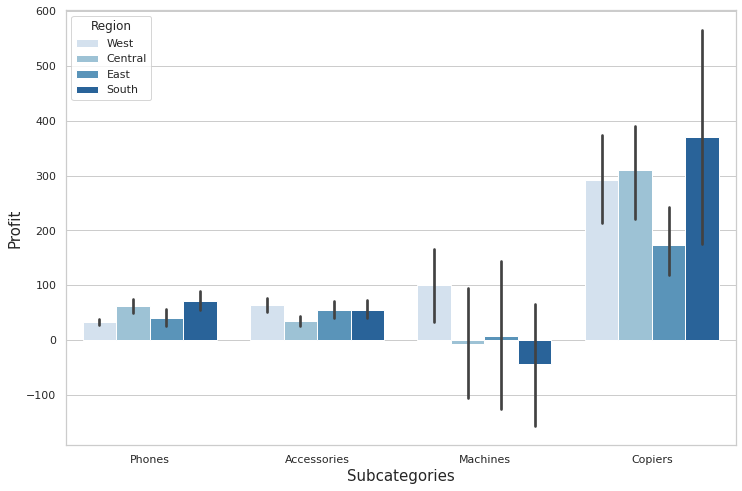

In [89]:
#Let's get the Profit of each Subcategory under Technology for each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Observations:- Here also, same picture can be seen. 'Copiers' is well ahead of others, while 'Machines' is not at all performing well, especially in the 'Second Class', where Consumers are large in Count, as seen earlier. So, further steps are to be talken accordingly!

Inferences and Conclusion
We are at the end of the project. We have downloaded the dataset, explored it, cleaned it and analysed it at every possible way. In between all these we have encountered some awesome facts about the data. So, after this exploratory analysis we can conclude our observations and insights in some simple points as follows....
1. Large cities, like New York, Los Angeles, Seatle, San Francisco are generating highest amount of Sales as well as Profit.
2. In case of Categories, Technology is always leading in terms of Sales and Profit.
3. Some cities are there, where company is giving huge discounts but very less sales and profit is generating.
4. Also there are cities, where discounts are totaly '0', but they are generating high profits.
5. Maximum corporates as well as consumers prefer the Standard class of ship-mode.
6. There are cities where sales as well as profit is very low, infact company is going with a loss there.
Above insights are just few such key points where the organization should focus more to enhance their business and reduce the loss as much as possible. Company campaigns can be well directed with help of these key notes.